# overview exercises

In [ ]:
Hypothesis statment should be written based on potential outcome of variable 
alternative statement is what you are actually testing, should show that variable is reason for change in outcome

Has the network latency gone up since we switched internet service providers?
T-test, comparing means 
a is before switch (boolean)
b is after switch

mean continuous variable 

H_{0}:mean_a<= mean_b
H_{a}:mean_a > mean_b

True positive:reject mean_a<= mean_b when h_{0} is false/ Latency increased and we said it did
True negative:fail to reject h_{0} when h{0} is true / latency didn't go up and we said it didn't go up

Type I error: latency didn't go up when it has  
Type II error: latency did go up when we said it didn't 

In [ ]:
Is the website redesign any good?
mean - continuous 
before/after design - boolean

H_{0}: mean_before_design >= mean_after_design 
H_{a}: mean_before_design < mean_after_design

accept alternative....and alternative is true
True positive:more time spent on new website than old website and said that

accept null and null is true
True negative:spend less or equal time on site now and said that


Type I error: said site is better but it is not


Type II error: said site is not better but it is better  

In [ ]:
Is our television ad driving more sales?
before/after ads 
increase of sales - outcome variable

H_{0}:meansales_1 >= meansales_2
H_{a}:meansales_1 < meansales_2

accept alternative....and alternative is true
True positive:post add sales are higher than pre ad sales and that is what we said

accept null and null is true
True negative:sales did not increase afte ad and we said that 


Type I error: post ad sale are not higher but we said they are


Type II error: post ad sale are higher but we said they were not

# T-Test exercises

In [25]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Measuring average time it takes to sell home in days. 
#Anova test 


α = .05


In [8]:

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)
#use rvs to generate random results of samples 
#not given specific info for samples 

In [9]:
print(office_1.var())
print(office_2.var())

137.55113776373193
363.73788758705786


In [10]:
stat,p_val = stats.levene(office_1, office_2)

if p_val < .05:
    print('we can reject H0 ==> inequal variance')
    
#conduct levene test to determine if variance equal or not

we can reject H0 ==> inequal variance


In [16]:
p_val

7.35475873732067e-05

In [20]:

t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=True)
print(f't-stat): {t_stat}')
print(f'p-value: {p_val}')

t-stat): -4.160992900247473
p-value: 7.35475873732067e-05


In [26]:
#copy past print statement 

print(f'''
Because the p-value ({p_val}) is less than alpha value ({α}), we reject the null hypothesis''')


Because the p-value (7.35475873732067e-05) is less than alpha value (0.05), we reject the null hypothesis


In [27]:
from pydataset import data

mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [59]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

# creates avg fuel efficiency column with harmonic mean across all cars

In [34]:
fe_2008 = mpg[mpg.year == 2008].avg_fe 
fe_1999 = mpg[mpg.year == 1999].avg_fe 


#now filter by year column with avg fuel efficiency

<AxesSubplot:>

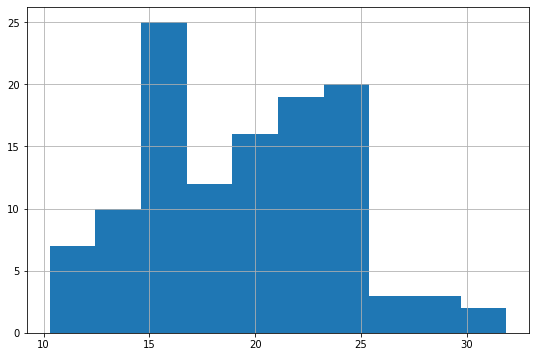

In [35]:
#creates histograms of both 
plt.figure(figsize=(9,6))
fe_2008.hist()

In [36]:
fe_2008.count(), fe_1999.count()

#normality assumption 

(117, 117)

In [37]:
#check variance 
fe_2008.var(), fe_1999.var()

#levene test next

(22.550836772260343, 25.850396545865912)

In [38]:
#levene test 
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [39]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t,p

(-0.3011962975077886, 0.7635345888327115)

In [42]:
print(f'''
Because p({p:.3f})) > alpha (.05), we fail to reject th null\ hypothesis that there is no difference in fuel-efficiency in cars\from 2008 and 1999.''')

#.3f limits to thousandsths place for rounding


Because p(0.764)) > alpha (.05), we fail to reject th null\ hypothesis that there is no difference in fuel-efficiency in carsrom 2008 and 1999.


In [43]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

In [35]:
#create side by side histogram 

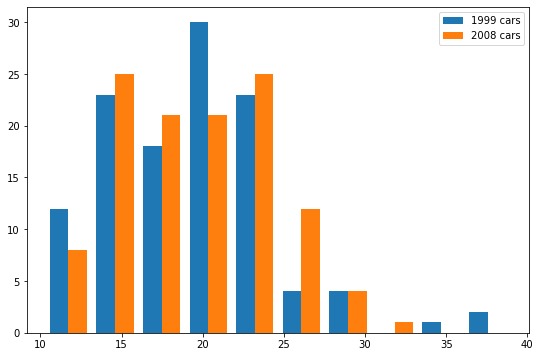

In [44]:
plt.figure(figsize=(9,6))
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

**C. Set Significance Level**

In [47]:
α = .05

In [43]:
#t value and p value 
#because one tail have to do p/2 and t > 0 if compact car goes into function first 

SyntaxError: invalid syntax (4077557464.py, line 1)

In [49]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

In [50]:
#mean fuel efficeincy of all cars 
m = mpg.avg_fe.mean()

In [51]:
fe_compact.count()

#greater than 30 assume normality

47

<AxesSubplot:>

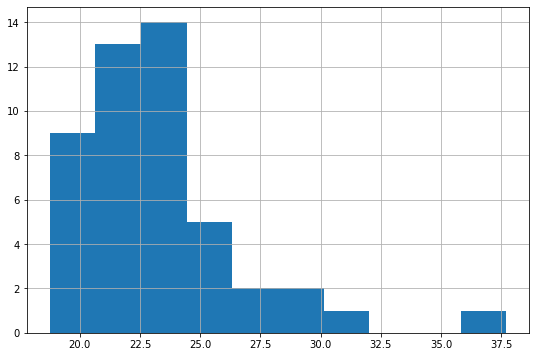

In [52]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

plt.figure(figsize=(9,6))
fe_compact.hist()

In [54]:
# calculate t and p values:

t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2, alpha
#significantly less than alpha 

#there appears to be a relationship between compact cars and mpg 

(7.512360093161354, 7.808833174403837e-10, 0.05)

In [55]:
print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0, we reject the null hypothesis.''')


Because p/2 (0.00000000078) < alpha (.05) and t > 0, we reject the null hypothesis.


In [56]:
mpg.trans.value_counts()

#vehicle counts

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [57]:
mpg.trans.str.contains('auto')

#find automatic cars 


1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [61]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_man = mpg[mpg.trans.str.contains('manual')].avg_fe

#only automatics 

<AxesSubplot:>

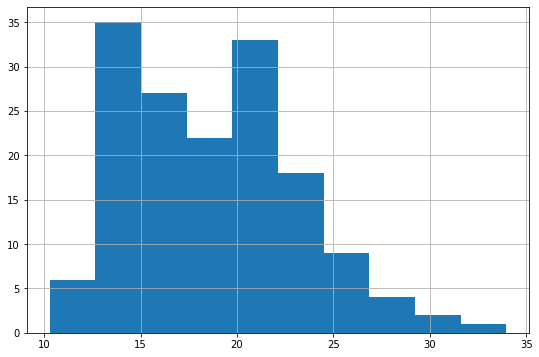

In [62]:
#visual of fuel efficiency 
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_auto.hist()

<AxesSubplot:>

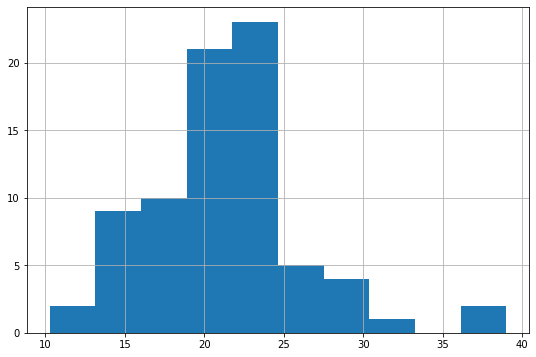

In [67]:
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_man.hist()

In [63]:
#normalcy with counts 
fe_auto.count(), fe_man.count()

(157, 77)

In [64]:
#check variance

fe_auto.var(), fe_man.var()

(20.428279095002054, 25.665633639828275)

In [65]:
stats.levene(fe_auto, fe_man)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [68]:
t, p = stats.ttest_ind(fe_man, fe_auto, equal_var = True)

t, p/2

#manual first because checking if manual > auto
# t greater than 1, p < .05 reject null

#there appears to be a significance
#that manual cars get more gas mpg than automatic 

(4.652577547151351, 2.7552323050220043e-06)

In [69]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), and t > 0, we reject the null hypothesis''')


Because p/2 (0.000003) < alpha (.05), and t > 0, we reject the null hypothesis


In [70]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')


Text(0.5, 1.0, 'Is mileage different by transmission type?')

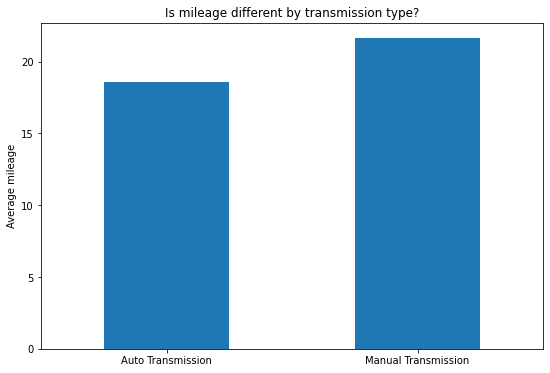

In [71]:
plt.figure(figsize=(9,6))
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation Exercises 

In [74]:
# read from the SQL database
from get_db_url import make_db

    
df = make_db('telco_churn','SELECT * FROM customers')
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

# 2a. Does tenure correlate with monthly charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and monthly_charges.
- $H_a$: There is a linear relationship between tenure and monthly_charges.

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

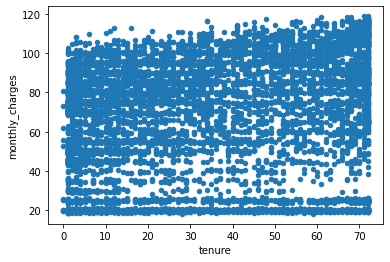

In [76]:
#chart of variables 

df.plot.scatter(y='monthly_charges', x='tenure')

In [77]:
x = df.tenure
y = df.monthly_charges

In [78]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.24789985628615246
p = 4.094044991483017e-99


In [79]:
# 0: No relationship
# 0 - 0.2: Weak positive relationship
# 0.2 - 0.4: Moderate positive relationship
# 0.4 - 1: Strong positive relationship

# 0 - -0.2: Weak negative relationship
# -0.2 - -0.4: Moderate negative relationship
# -0.4 - -1: Strong negative relationship

Conclusion: we reject the null hypothesis that there is no linear relationship between exam score and number of hours studied.

# 2 b. Does tenure correlate with monthly charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and total_charges.
- $H_a$: There is a linear relationship between tenure and total_charges.

In [99]:
df

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

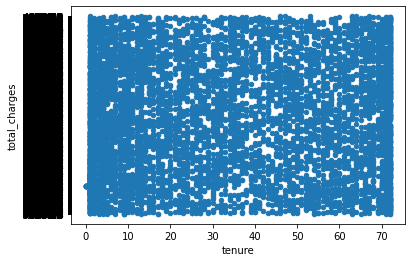

In [80]:
#chart of variables 

df.plot.scatter(y='total_charges', x='tenure')

In [91]:
x = df.tenure
y = df = df.astype({'total_charges': 'float'})

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

ValueError: could not convert string to float: ''

# 2c. Control for phone and internet service?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and phone and internet service.
- $H_a$: There is a linear relationship between tenure and phone and internet service.

SyntaxError: invalid syntax (1344769718.py, line 1)

# 3a. Is there a relationship between how long an employee has been with the company and their salary?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and salary.
- $H_a$: There is a linear relationship between tenure and salary.

# 3b. Is there a relationship between how long an employee has been with the company and number of titles they have had?
- $\alpha = .05$
- $H_0$: There is no linear relationship between how long an employee has been with the company and number of titles there have had.
- $H_a$: There is a linear relationship between thow long an employee has been with the company and number of titles there have had.

# 4. Is there a relationship between days and reaction time?

- $\alpha = .05$
- $H_0$: There is no linear relationship between days and reaction time.
- $H_a$: There is a linear relationship between days and reaction time.